**1. Loading the Data**

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
df = pd.read_csv('AAPL.csv')

In [12]:
df.shape

(251, 7)

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
1,2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2,2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
3,2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
4,2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


**2. Data Preprocessing**

In [14]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [16]:
#'Date' col to 'Datetime' col
df['Date']= pd.to_datetime(df['Date'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [18]:
#date col as index
df.set_index('Date', inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-08-15 to 2019-08-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,209.220001,210.740005,208.330002,210.240005,207.027420,28807600
2018-08-16,211.750000,213.809998,211.470001,213.320007,210.060333,28500400
2018-08-17,213.440002,217.949997,213.160004,217.580002,214.255234,35427000
2018-08-20,218.100006,219.179993,215.110001,215.460007,212.167633,30287700
2018-08-21,216.800003,217.190002,214.029999,215.039993,211.754028,26159800


In [21]:
#sort
df.sort_index(inplace = True)

In [22]:
#data normalisation
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(df[df.columns])

In [23]:
scaler_values

array([[0.75161293, 0.74096871, 0.75563913, 0.7571206 , 0.75577275,
        0.20552114],
       [0.78076039, 0.77595438, 0.79141036, 0.79138853, 0.79023062,
        0.20190211],
       [0.80023046, 0.82313386, 0.81066308, 0.838785  , 0.83789019,
        0.28350221],
       ...,
       [0.64101379, 0.64193734, 0.65105941, 0.64853127, 0.68138544,
        0.13091759],
       [0.65714293, 0.75692305, 0.66621094, 0.7429906 , 0.77784302,
        0.42241417],
       [0.6817973 , 0.69196582, 0.69024831, 0.67378721, 0.70717566,
        0.29559037]])

In [24]:
df_scaled = pd.DataFrame(scaler_values, columns = df.columns, index = df.index)

In [25]:
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-15,0.751613,0.740969,0.755639,0.757121,0.755773,0.205521
2018-08-16,0.780760,0.775954,0.791410,0.791389,0.790231,0.201902
2018-08-17,0.800230,0.823134,0.810663,0.838785,0.837890,0.283502
2018-08-20,0.853917,0.837151,0.832878,0.815198,0.814172,0.222958
2018-08-21,0.838940,0.814473,0.820574,0.810525,0.809473,0.174328


**3. Plotting the Columns**

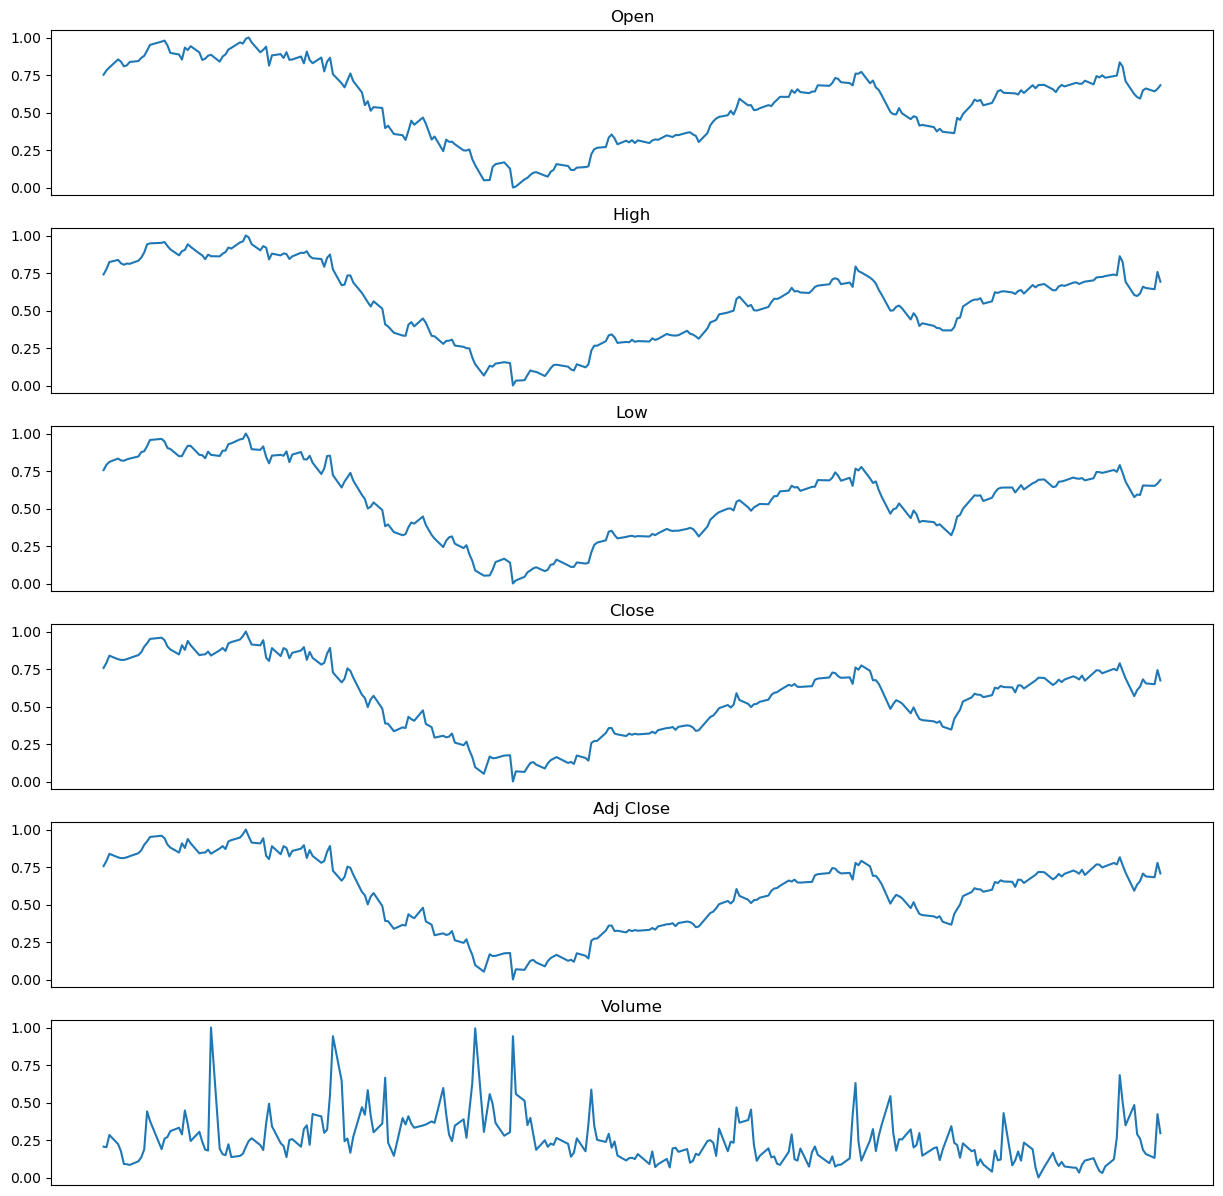

In [26]:
plt.rcParams['figure.figsize'] = (15,15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

**4. Creating Sliding Window Sequences.**

In [27]:
def create_sequence(data, window_size):
    X = []
    Y= []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        Y.append(data.iloc[i].values)
    return np.array(X), np.array(Y)

In [28]:
window_size = 60
X, Y = create_sequence(df_scaled,window_size)

In [29]:
X.shape, Y.shape

((191, 60, 6), (191, 6))

**5. Train-Test Split**

In [34]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape

((152, 60, 6), (39, 60, 6))

**6. Building LSTM Model**

In [36]:
model = keras.Sequential([
    #first lstm layer
    keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])),
    keras.layers.Dropout(0.3),

    #second lstm layer
    keras.layers.LSTM(units = 50, return_sequences = True),
    keras.layers.Dropout(0.3),

    #third lstm layer
    keras.layers.LSTM(units = 50, return_sequences = False),
    keras.layers.Dropout(0.3),

    #output layer
    keras.layers.Dense(Y_train.shape[1])
])

In [37]:
#compilation
model.compile(optimizer= 'adam',
              loss = 'mean_squared_error',
              metrics=['RootMeanSquaredError'])

In [40]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience = 10,
                               restore_best_weights = True)

In [41]:
lstm_model = model.fit(X_train,Y_train,
                       validation_split = 0.2,
                       epochs = 100,
                       batch_size = 3,
                       callbacks = [early_stopping])

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - RootMeanSquaredError: 0.2716 - loss: 0.0762 - val_RootMeanSquaredError: 0.1821 - val_loss: 0.0332
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - RootMeanSquaredError: 0.1816 - loss: 0.0330 - val_RootMeanSquaredError: 0.1147 - val_loss: 0.0132
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - RootMeanSquaredError: 0.1424 - loss: 0.0203 - val_RootMeanSquaredError: 0.1061 - val_loss: 0.0113
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - RootMeanSquaredError: 0.1589 - loss: 0.0253 - val_RootMeanSquaredError: 0.0936 - val_loss: 0.0088
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - RootMeanSquaredError: 0.1294 - loss: 0.0169 - val_RootMeanSquaredError: 0.0861 - val_loss: 0.0074
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - RootMeanSquaredError: 0.1348 - loss: 0.0183 - val_RootMeanSquaredError: 0.0966 - val_loss: 0.0093
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - RootMeanSquaredError: 0.1223 - los

In [42]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step


**7. Forecasting the Data**

In [43]:
predictions[:10]

array([[0.6281983 , 0.609622  , 0.60530126, 0.62738174, 0.6267787 ,
        0.16693029],
       [0.459962  , 0.44293392, 0.4443182 , 0.46023864, 0.45569146,
        0.1789558 ],
       [0.68463355, 0.6646902 , 0.6535237 , 0.6830283 , 0.6755147 ,
        0.17258786],
       [0.37249553, 0.3576712 , 0.3656936 , 0.3757297 , 0.37764734,
        0.20096034],
       [0.27195463, 0.25670576, 0.26845735, 0.27689785, 0.27772653,
        0.22734399],
       [0.37336102, 0.3624788 , 0.33950073, 0.36819145, 0.36189166,
        0.3209539 ],
       [0.48802733, 0.4751941 , 0.44769102, 0.4821026 , 0.47391438,
        0.31361502],
       [0.36523896, 0.3545887 , 0.33352217, 0.3605981 , 0.3556866 ,
        0.31674013],
       [0.61622983, 0.6005641 , 0.57498187, 0.6122008 , 0.59834266,
        0.24962337],
       [0.68700224, 0.67123824, 0.6488062 , 0.68521494, 0.6743499 ,
        0.21650343]], dtype=float32)

In [44]:
#inverse Scaling
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(Y_test)

In [45]:
predictions[:10]

array([[1.9850761e+02, 1.9921434e+02, 1.9513335e+02, 1.9857907e+02,
        1.9567361e+02, 2.5531828e+07],
       [1.8390469e+02, 1.8458745e+02, 1.8100226e+02, 1.8355626e+02,
        1.8061485e+02, 2.6552608e+07],
       [2.0340619e+02, 2.0404655e+02, 1.9936630e+02, 2.0358058e+02,
        1.9996327e+02, 2.6012070e+07],
       [1.7631261e+02, 1.7710564e+02, 1.7410059e+02, 1.7596060e+02,
        1.7374557e+02, 2.8420458e+07],
       [1.6758566e+02, 1.6824593e+02, 1.6556519e+02, 1.6707758e+02,
        1.6495074e+02, 3.0660028e+07],
       [1.7638773e+02, 1.7752751e+02, 1.7180138e+02, 1.7528305e+02,
        1.7235878e+02, 3.8606076e+07],
       [1.8634076e+02, 1.8741827e+02, 1.8129831e+02, 1.8552138e+02,
        1.8221881e+02, 3.7983116e+07],
       [1.7568274e+02, 1.7683514e+02, 1.7127658e+02, 1.7460056e+02,
        1.7181262e+02, 3.8248392e+07],
       [1.9746875e+02, 1.9841949e+02, 1.9247191e+02, 1.9721460e+02,
        1.9317073e+02, 3.2551206e+07],
       [2.0361180e+02, 2.0462115e+02,

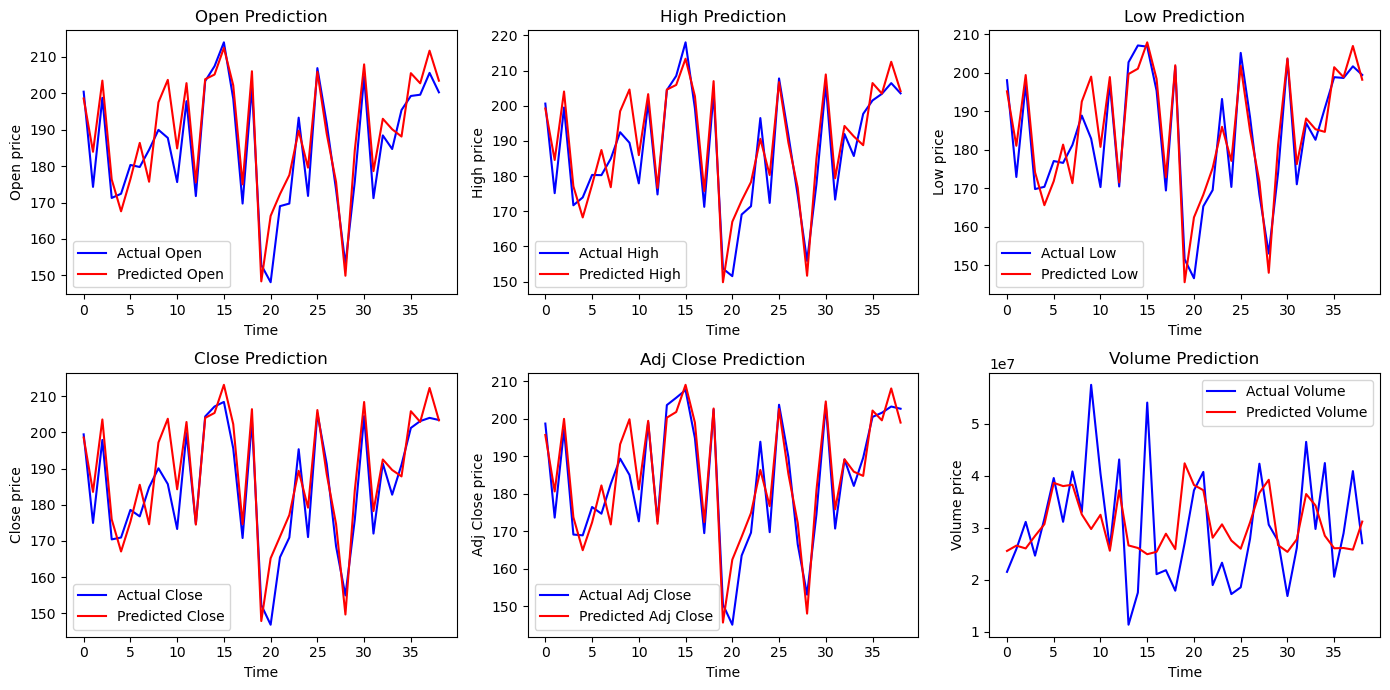

In [49]:
#plotting the results
plt.figure(figsize = (14,7))

for i, col in enumerate(df_scaled.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:, i],color = 'blue', label = f'Actual {col}')
    plt.plot(predictions[:, i], color = 'red', label = f'Predicted {col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} price')
    plt.legend()
plt.tight_layout()